#  <h1><center>E-Commerce Case Study</center></h1>

**AUTHOR :** *Emre Okçular*<br>
**DATE :** 05.09.2020

## Table of Contents

1. Introduction

2. Objectives

3. Data Sources

   3.a. Data Loading
   
   3.b. Data Preparation and Data Cleaning

4. Exploratory Data Analysis
    
    4.a. Anomaly Detection

    4.b. Product Sles Trend

    4.c Fetching 10 most sales products
    
    4.d Sampling

5. Data Transformation 

   5.a. One Hot Encoding
   
6. Regression Techniques
   
   6.a Linear Regression
   
   6.b Decision Tree Regressors
   
   6.c Extra Tree Regressors
   
   6.d Random Forest Regressors
   
   6.e Gradient Boosting Regressors
   
   6.f XGBoost Regressor
   
7. Light Gradient Boosting Method (LGBM)

8. Assumptions

9. Conclusion

10. Future Works

### 1. Introduction

Product sales forecasting is the key aspect for a business. Sale predictions are crucial in determining inventory stock and future demand. In addition, click count and favored count features are valueable information for e-commerce companies. On the other hand, it is challenging to predict every individual product sales with plenty of  features.Additionally, the problem become more complex as companies add new product with unique needs, new features, ever transitioning seasonal tastes, and unpredictable product marketing. In this case study, the dataset analysed and various of prediction models built. In addition, multiple regression methods are compared. The methods impact on forecast product availability in website to ensure they have just enough products at right time.

### 2. Objectives

We are asking you to build an algorithm(s) that can forecast the sales of any  product for next day. Please prepare the presentation with your results. In it, you’ll have to justify and explain:

1.	How did you create the target variable?
2.	How did you prepare the final dataset for modeling?
3.	How did you split datasets into training and testing?
4.	What methods did you use for modelling and why?
5.	How did you quantify the performance of your model(s)? 
<br>You need to be ready to explain all the assumptions that you made.<br>
Together with your presentation (in PDF/Excel) you'll need to provide us with your source code written in Python/R/Spark.


### 3. Data Sources

In [2]:
import sys # System
print("Python Version:",sys.version[0:5]) # Python 3.8 is used.

Python Version: 3.8.3


In [3]:
import time
start = time.time() # For execution time calculation

In [4]:
#Necessary imports 
import pandas as pd # Most common library for data science
pd.options.display.max_rows = 100 # I set max rows to see more output
pd.options.display.max_columns = 100 # I set max columns to see more outputs.
import numpy as np # Numerical callculations with data.
from sklearn import linear_model # Machine Learning Models and tools
from sklearn.model_selection import cross_val_score # Machine Learning Models and tools
from sklearn.linear_model import Lasso # Machine Learning Models and tools
from sklearn.preprocessing import StandardScaler # Machine Learning Models and tools
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, ElasticNetCV # Machine Learning Models and tools
from sklearn.metrics import mean_squared_error, make_scorer # Machine Learning Models and tools
from sklearn.model_selection import train_test_split # Machine Learning Models and tools
from sklearn.feature_selection import RFE # Machine Learning Models and tools
from sklearn.feature_selection import SelectKBest # Machine Learning Models and tools
from sklearn.feature_selection import chi2 # Machine Learning Models and tools
from sklearn.preprocessing import LabelEncoder, MinMaxScaler # Preprocessing tools.
from sklearn.ensemble import RandomForestClassifier # Random Forest Machine Learning Algorithm
from sklearn import metrics # Metrics.
from sklearn import tree # Decision Tree
from sklearn.model_selection import GridSearchCV # Parameter tuning.
from sklearn.tree import DecisionTreeRegressor # Machine Learning Models and tools
from sklearn.metrics import r2_score # Machine Learning Models and tools
from sklearn.metrics import mean_squared_error # Machine Learning Models and tools
from sklearn.ensemble import ExtraTreesRegressor # Machine Learning Models and tools
from sklearn.ensemble import RandomForestRegressor # Machine Learning Models and tools
from sklearn.model_selection import GridSearchCV  # Machine Learning Models and tools
from sklearn.ensemble import GradientBoostingRegressor # Machine Learning Models and tools
import lightgbm as lgb # Machine Learning Models and tools
from xgboost import XGBRegressor # Machine Learning Models and tools
import pandas_profiling # Very useful package for EDA with dynamic HTML frontend.
import graphviz # Visualisation
from plotly.offline import init_notebook_mode, iplot # Visualisation
from pandas.plotting import parallel_coordinates # Visualisation
import matplotlib as mpl # Visualisation
import matplotlib.pyplot as plt # Visualisation
import seaborn as sns # Visualisation
import matplotlib.ticker as ticker # Visualisation
from scipy.stats import itemfreq # Visualisation

%matplotlib inline
%config InlineBackend.figure_format='retina' # I set this property for high resolution for graphs.

import os # Operating System
from IPython.display import Image # Image show

import warnings # Supress warnings.
warnings.filterwarnings('ignore') # Ignore warnings

#### 3.a Data Loading

In [5]:
#Read data from local disc
df_prd = pd.read_csv('X_DataScience_CS2/productDailyActions.csv')
df_prd_attr = pd.read_csv('X_DataScience_CS2/productAttributes.csv')

In [6]:
df_prd.head()

,productid,date,soldquantity,stock,clickcount,favoredcount
0,1,2018-11-23,0,140,82.0,NaN
1,21,2018-11-30,0,3,11.0,NaN
2,21,2018-12-27,0,2,2.0,NaN
3,21,2019-01-09,0,2,2.0,1.0
4,21,2018-12-18,0,2,5.0,NaN


#### 3.b. Data Preparation and Data Cleaning

In [7]:
print("Zero Sold Total:", len(df_prd[df_prd["soldquantity"]==0]))

Zero Sold Total: 716293


In [8]:
print("Color Range :",df_prd_attr["color"].max()-df_prd_attr["color"].min())

Color Range : 15326


In [9]:
print("Number of Unique Column:", df_prd_attr["color"].nunique())

Number of Unique Column: 2243


In [10]:
df_prd_attr.head()

,productid,gender,color,categoryid,brandid,subcategoryid,price
0,81,2,4893,407,390,20,2114
1,121,1,1684,411,390,23,1851
2,141,2,5414,434,390,56,2236
3,161,2,3500,411,390,23,1851
4,181,2,6784,1825,390,68,1421


In [11]:
df_merged = pd.merge(df_prd, df_prd_attr, on='productid',how="left") # Two dataset joined on "productid"

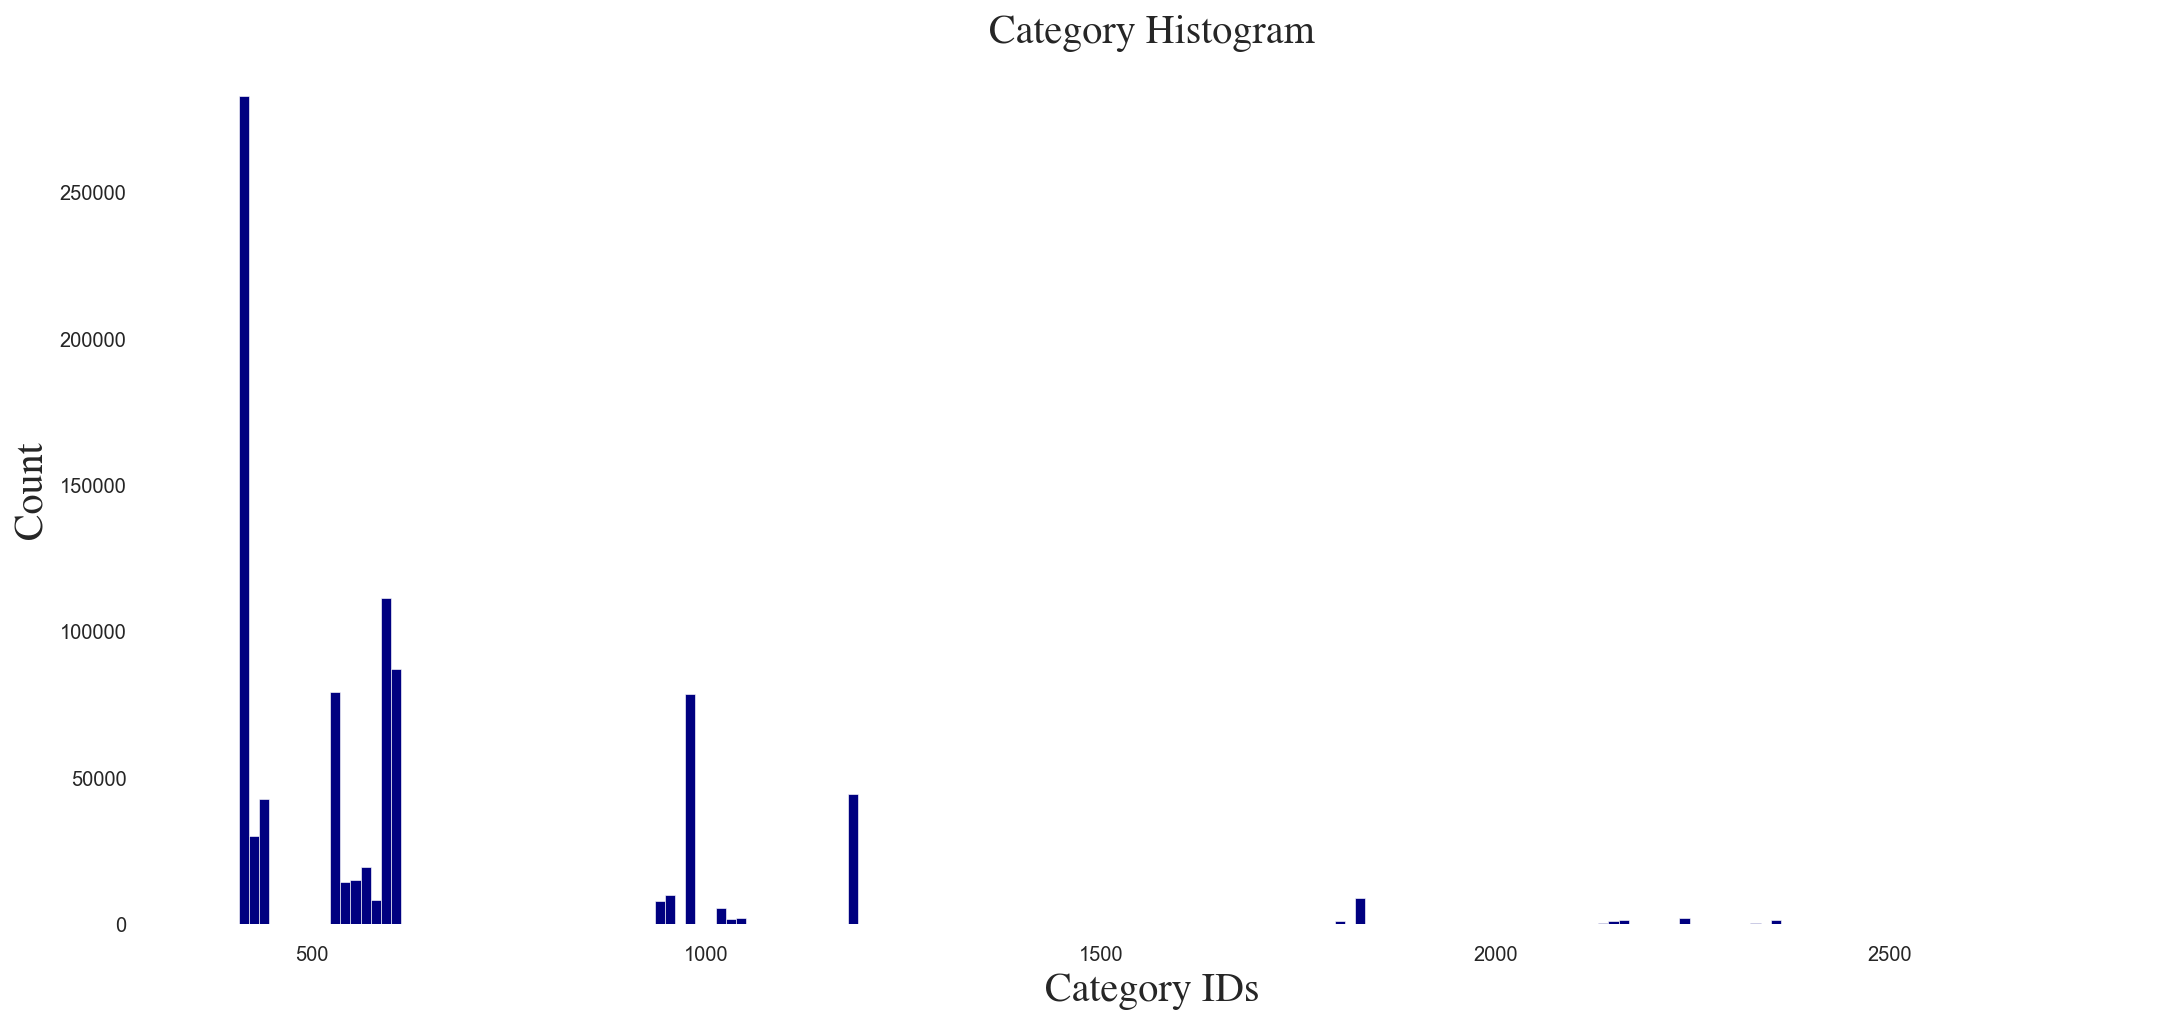

In [12]:
fig, ax = plt.subplots(figsize=(18,8))
ax.hist(df_merged['categoryid'],bins=180,color="navy")
ax.set_xlabel("Category IDs",fontsize=20, fontname="Times")
ax.set_ylabel("Count",fontsize=20, fontname="Times")
ax.set_title("Category Histogram",fontsize=20, fontname="Times")
plt.show()

In [13]:
print("Correlation between Sales and CategoryId",df_merged['soldquantity'].corr(df_merged['categoryid']))
print("Correlation between Sales and SubCategoryId",df_merged['soldquantity'].corr(df_merged['subcategoryid']))
print("Correlation between Sales and BrandId",df_merged['soldquantity'].corr(df_merged['brandid']))

Correlation between Sales and CategoryId 0.0026376389180055174
Correlation between Sales and SubCategoryId -0.008058830561644848
Correlation between Sales and BrandId 0.010135447168976741


In [14]:
del df_merged["color"] # See Assumptions section
del df_merged["subcategoryid"]  # See Assumptions section
del df_merged["stock"]  # See Assumptions section
del df_merged["categoryid"]  # See Assumptions section

In [15]:
df_merged.head()

,productid,date,soldquantity,clickcount,favoredcount,gender,brandid,price
0,1,2018-11-23,0,82.0,NaN,1,603,1996
1,21,2018-11-30,0,11.0,NaN,2,1113,1100
2,21,2018-12-27,0,2.0,NaN,2,1113,1100
3,21,2019-01-09,0,2.0,1.0,2,1113,1100
4,21,2018-12-18,0,5.0,NaN,2,1113,1100


In [16]:
df_merged.isnull().sum()

productid            0
date                 0
soldquantity         0
clickcount      115612
favoredcount    557743
gender               0
brandid              0
price                0
dtype: int64

In [17]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 858935 entries, 0 to 858934
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   productid     858935 non-null  int64  
 1   date          858935 non-null  object 
 2   soldquantity  858935 non-null  int64  
 3   clickcount    743323 non-null  float64
 4   favoredcount  301192 non-null  float64
 5   gender        858935 non-null  int64  
 6   brandid       858935 non-null  int64  
 7   price         858935 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 59.0+ MB


In [18]:
df_merged.clickcount = df_merged.clickcount.fillna("0") # Filling null values as 0
df_merged.favoredcount = df_merged.favoredcount.fillna("0") # Filling null values as 0
df_merged["date"] = pd.to_datetime(df_merged["date"]) # Date column formatted
df_merged.clickcount = df_merged.clickcount.astype(int) # Type Conversation
df_merged.favoredcount = df_merged.favoredcount.astype(int) # Type Conversation
df_merged.gender = df_merged.gender.astype(str) # Type Conversation
df_merged.brandid = df_merged.brandid.astype(str) # Type Conversation

In [19]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 858935 entries, 0 to 858934
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   productid     858935 non-null  int64         
 1   date          858935 non-null  datetime64[ns]
 2   soldquantity  858935 non-null  int64         
 3   clickcount    858935 non-null  int64         
 4   favoredcount  858935 non-null  int64         
 5   gender        858935 non-null  object        
 6   brandid       858935 non-null  object        
 7   price         858935 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 59.0+ MB


In [20]:
df_merged.isnull().sum()

productid       0
date            0
soldquantity    0
clickcount      0
favoredcount    0
gender          0
brandid         0
price           0
dtype: int64

### 4. Exploratory Data Analysis

In [21]:
df_merged.describe()

,productid,soldquantity,clickcount,favoredcount,price
count,858935.000000,858935.000000,858935.000000,858935.000000,858935.000000
mean,99187.157835,0.503301,73.028705,1.737216,1648.455189
std,54747.325776,4.149183,384.176362,9.737323,1142.872588
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,52131.000000,0.000000,3.000000,0.000000,726.000000
50%,103531.000000,0.000000,12.000000,0.000000,1421.000000
75%,145291.000000,0.000000,45.000000,1.000000,2353.000000
max,199991.000000,1056.000000,69431.000000,1423.000000,5388.000000


In [22]:
# The profiling report can also be exported into an interactive HTML file with the following code.
profile = df_prd.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="Data profiling.html")

In [23]:
# You can find this file in e-mail attachments. 
pandas_profiling.ProfileReport(df_prd)

In [24]:
df_merged["productid"].nunique()

19359

In [25]:
dfn = df_merged.groupby('date')["soldquantity"].sum().reset_index()

#### 4.a Anomaly Detection

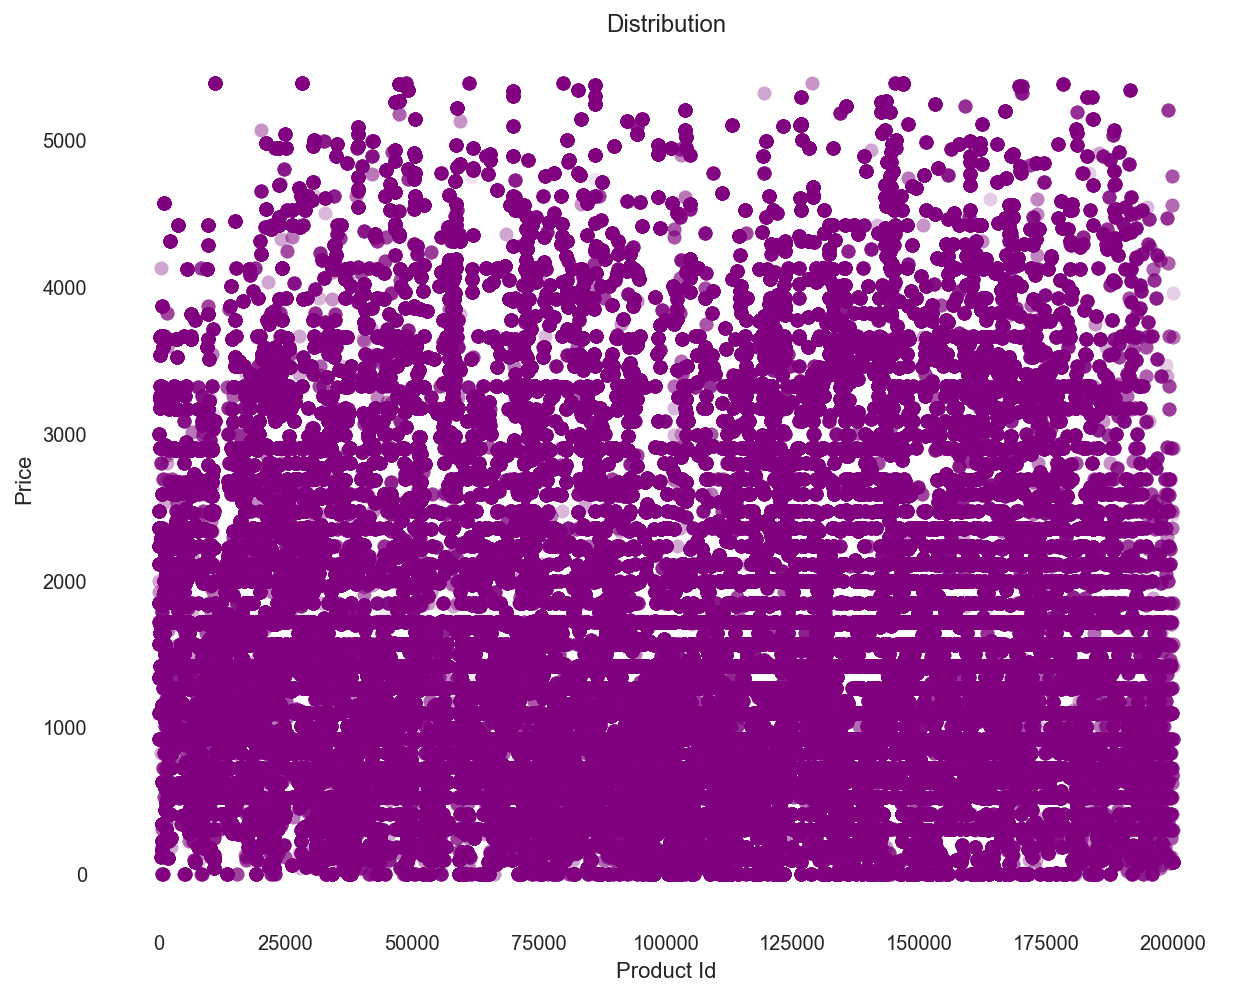

In [26]:
fig, ax = plt.subplots(figsize=(10,8))  # make one subplot (ax) on the figure
ax.plot(df_merged['productid'], df_merged['price'], 'o', color='purple',alpha=0.1);
ax.set_xlabel("Product Id")
ax.set_ylabel("Price")
ax.set_title("Distribution")
plt.show()

In [27]:
df_merged[df_merged.clickcount > 40000]

,productid,date,soldquantity,clickcount,favoredcount,gender,brandid,price
110691,34621,2018-11-21,255,42499,0,1,535,4188
134991,34601,2018-11-20,629,46572,0,2,226,4123
242481,34621,2018-11-20,788,69431,0,1,535,4188
292487,34611,2018-11-20,634,55458,0,1,226,3527
292494,34621,2018-11-22,235,50253,0,1,535,4188
584539,164491,2018-11-21,782,44308,512,1,529,1717
700319,34611,2018-11-21,371,41129,0,1,226,3527


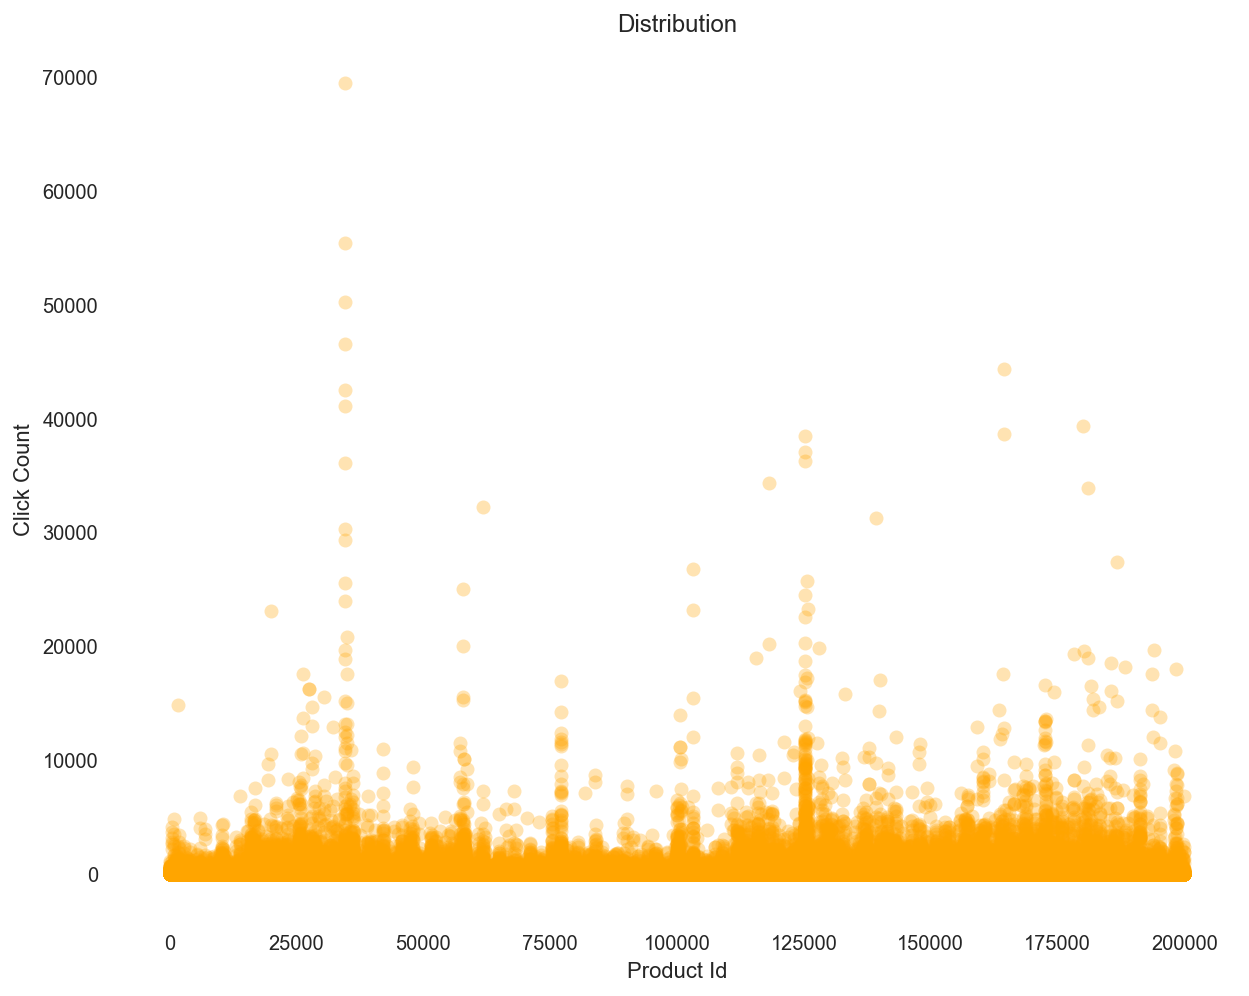

In [28]:
fig, ax = plt.subplots(figsize=(10,8))  # make one subplot (ax) on the figure
plt.plot(df_merged['productid'], df_merged['clickcount'], 'o', color='orange',alpha=0.3)
ax.set_xlabel("Product Id")
ax.set_ylabel("Click Count")
ax.set_title("Distribution")
plt.show()

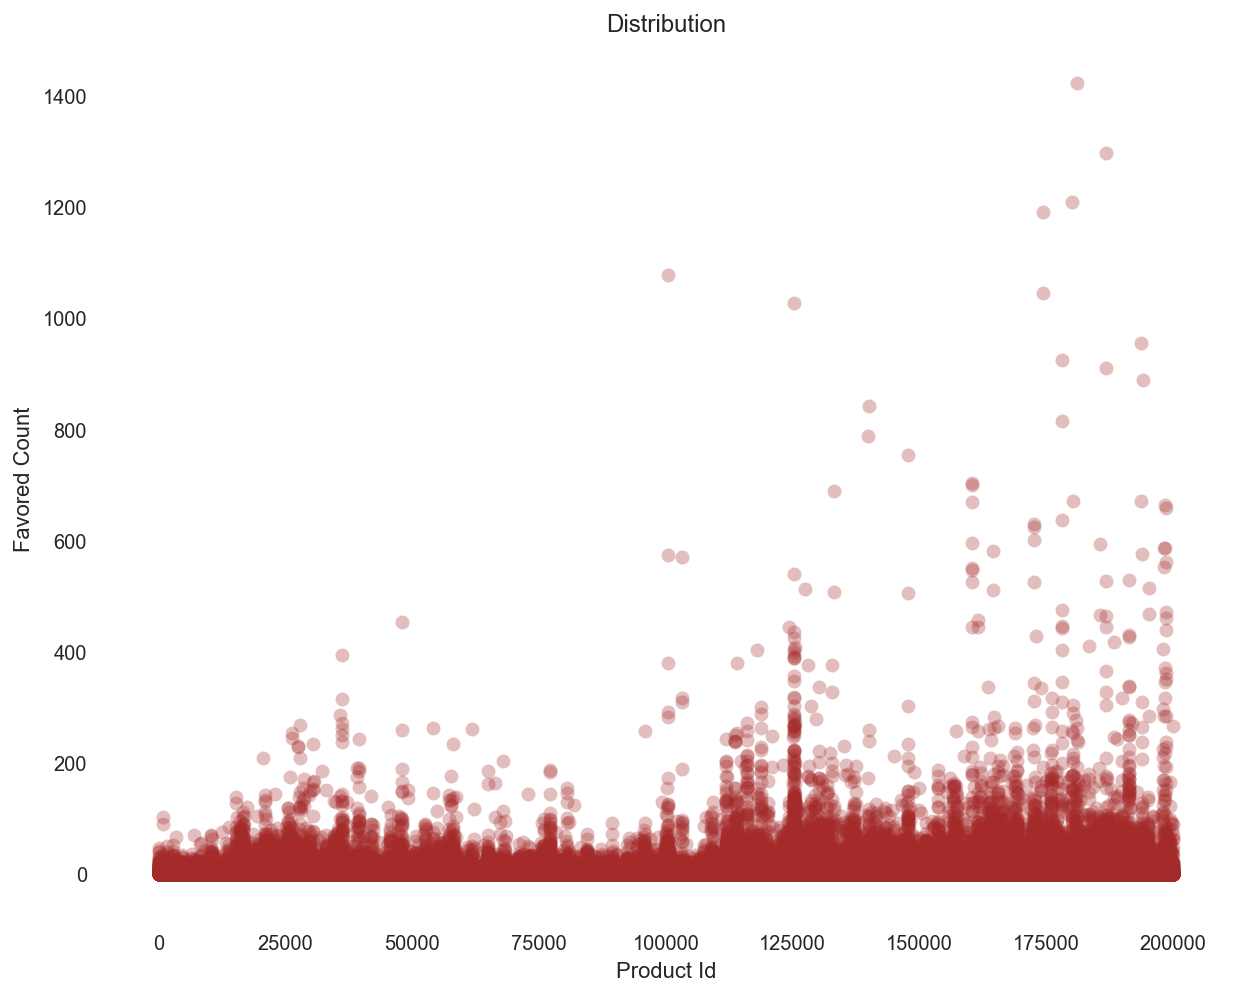

In [29]:
fig, ax = plt.subplots(figsize=(10,8))  # make one subplot (ax) on the figure
plt.plot(df_merged['productid'], df_merged['favoredcount'], 'o', color='brown',alpha=0.3)
ax.set_xlabel("Product Id")
ax.set_ylabel("Favored Count")
ax.set_title("Distribution")
plt.show()

#### 4.b. Product Sales Trend

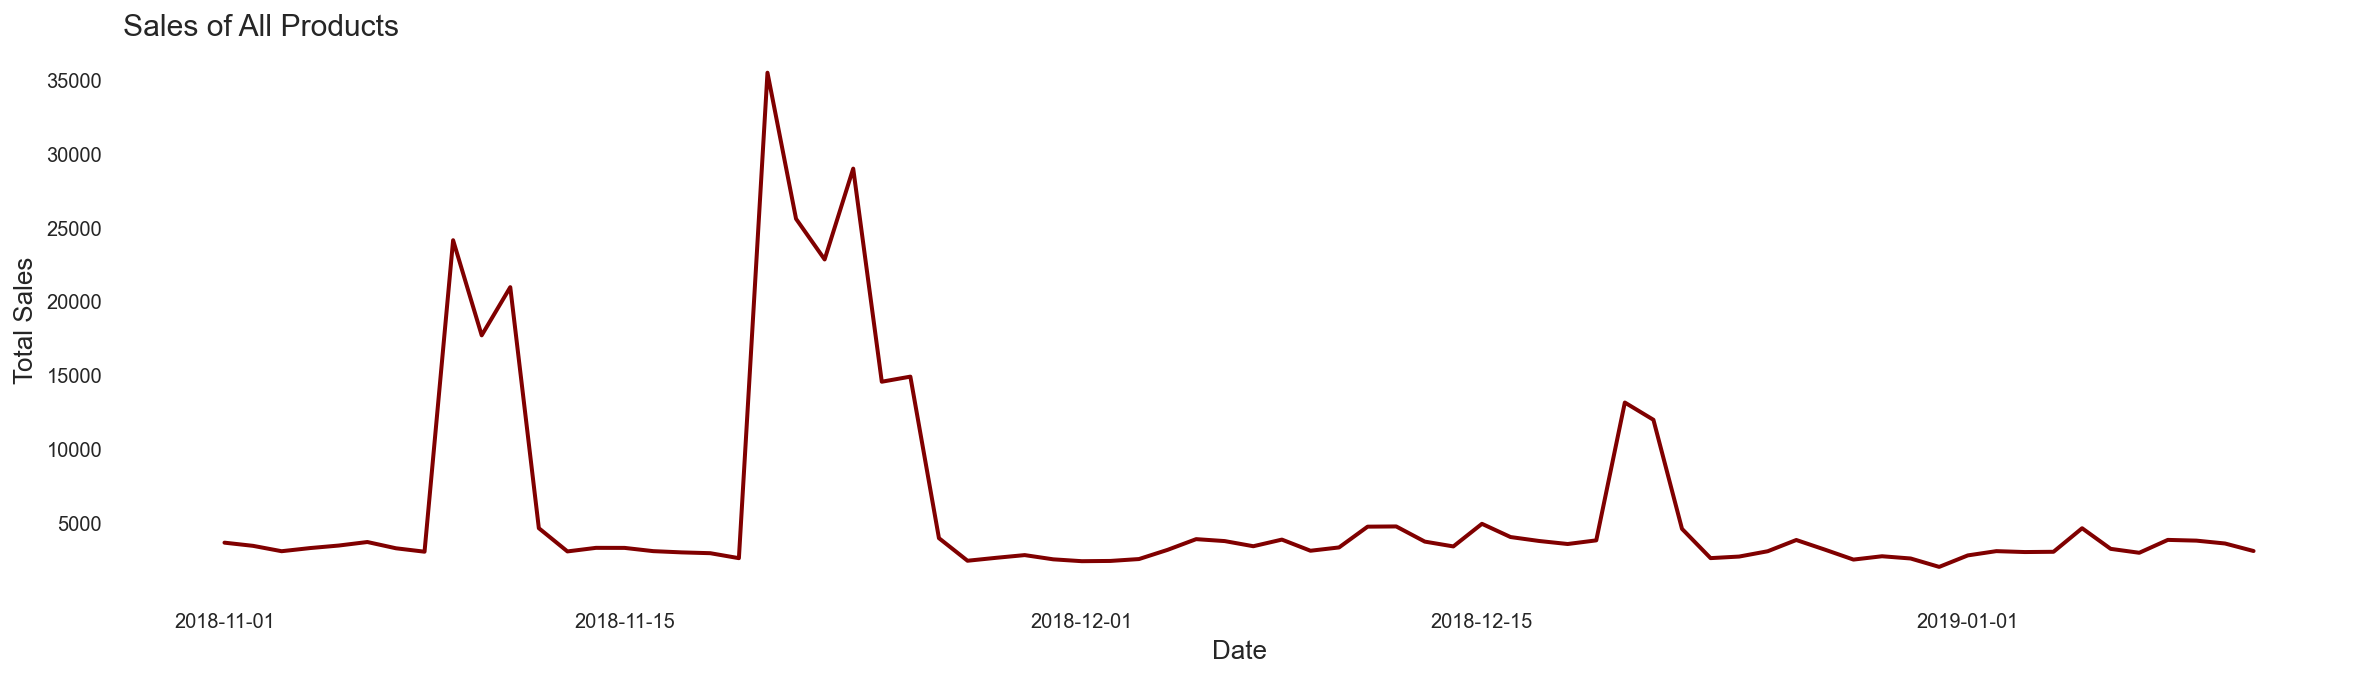

In [30]:
fig, ax = plt.subplots(figsize=(20,5))

ax.set_xlabel('Date', fontsize=13)
ax.set_ylabel('Total Sales', fontsize=13)
ax.set_title('Sales of All Products', fontsize=15,loc="left")


ax.plot(dfn['date'], dfn['soldquantity'],linewidth=2,color="maroon")
plt.show()

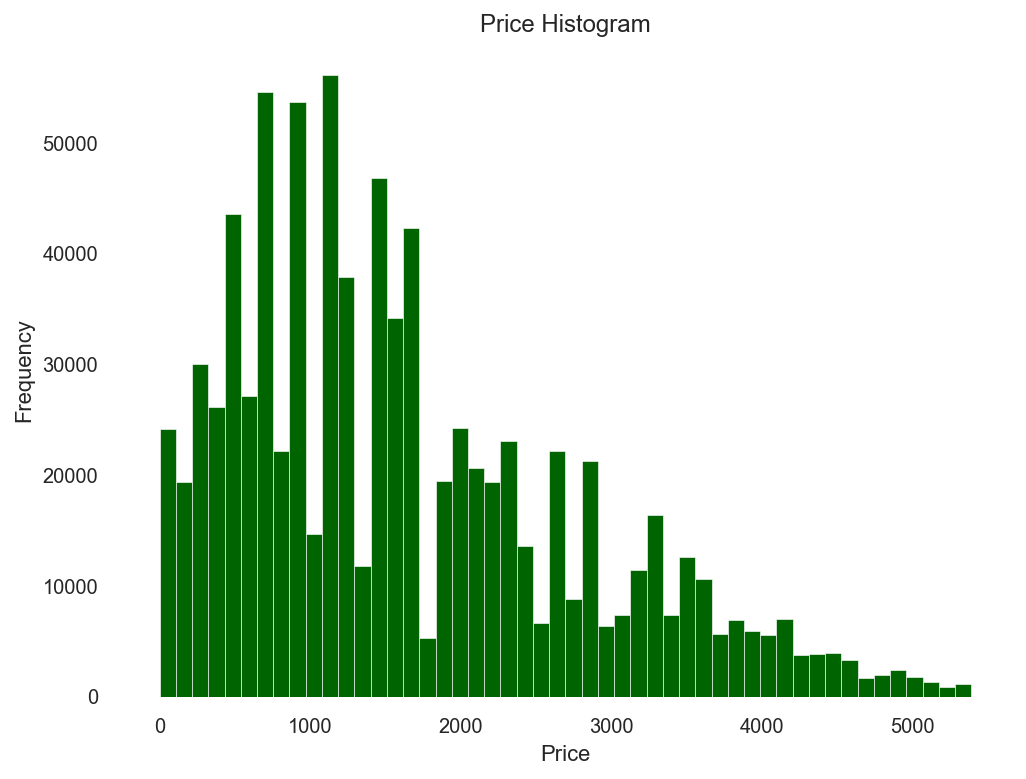

In [31]:
fig, ax = plt.subplots(figsize=(8,6))  # make one subplot (ax) on the figure
ax.hist(df_merged["price"],color="darkgreen",bins=50)
ax.set_xlabel("Price")
ax.set_ylabel("Frequency")
ax.set_title("Price Histogram")
plt.show()

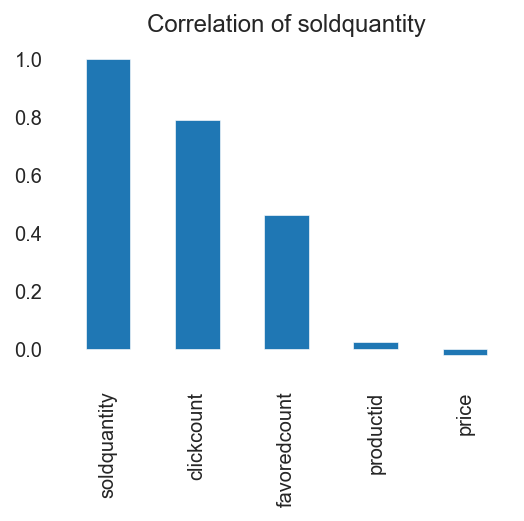

In [32]:
#Get Correlation of "soldquantity" with other variables:
plt.figure(figsize=(4,3))
df_merged.corr()['soldquantity'].sort_values(ascending = False).plot(kind='bar',title="Correlation of soldquantity")

plt.show()

#### 4.c. Top 10 Sold Product

In [33]:
df_tmp = df_merged.groupby(["productid"])["soldquantity"].sum().reset_index()

In [34]:
top_10 = df_tmp.sort_values("soldquantity",ascending=False)

In [35]:
top_10 = top_10[0:10]

In [36]:
top_10 = pd.merge(top_10, df_prd_attr, on='productid',how="left") # Two dataset joined on "productid"

In [37]:
top_10

,productid,soldquantity,gender,color,categoryid,brandid,subcategoryid,price
0,125161,3729,2,476,408,126,111,1721
1,164491,2128,1,478,601,529,92,1717
2,34621,2037,1,476,407,535,20,4188
3,36061,2028,2,476,599,1319,52,726
4,34611,1702,1,7489,407,226,20,3527
5,30481,1701,2,483,567,961,93,928
6,34601,1578,2,7489,407,226,20,4123
7,125541,1561,2,476,408,126,111,1995
8,172541,1530,2,476,590,267,15,1421
9,191311,1427,2,476,601,1319,92,527


In [38]:
top_10x = top_10.groupby(["color"])["productid"].count().reset_index()

In [39]:
top_10x

,color,productid
0,476,6
1,478,1
2,483,1
3,7489,2


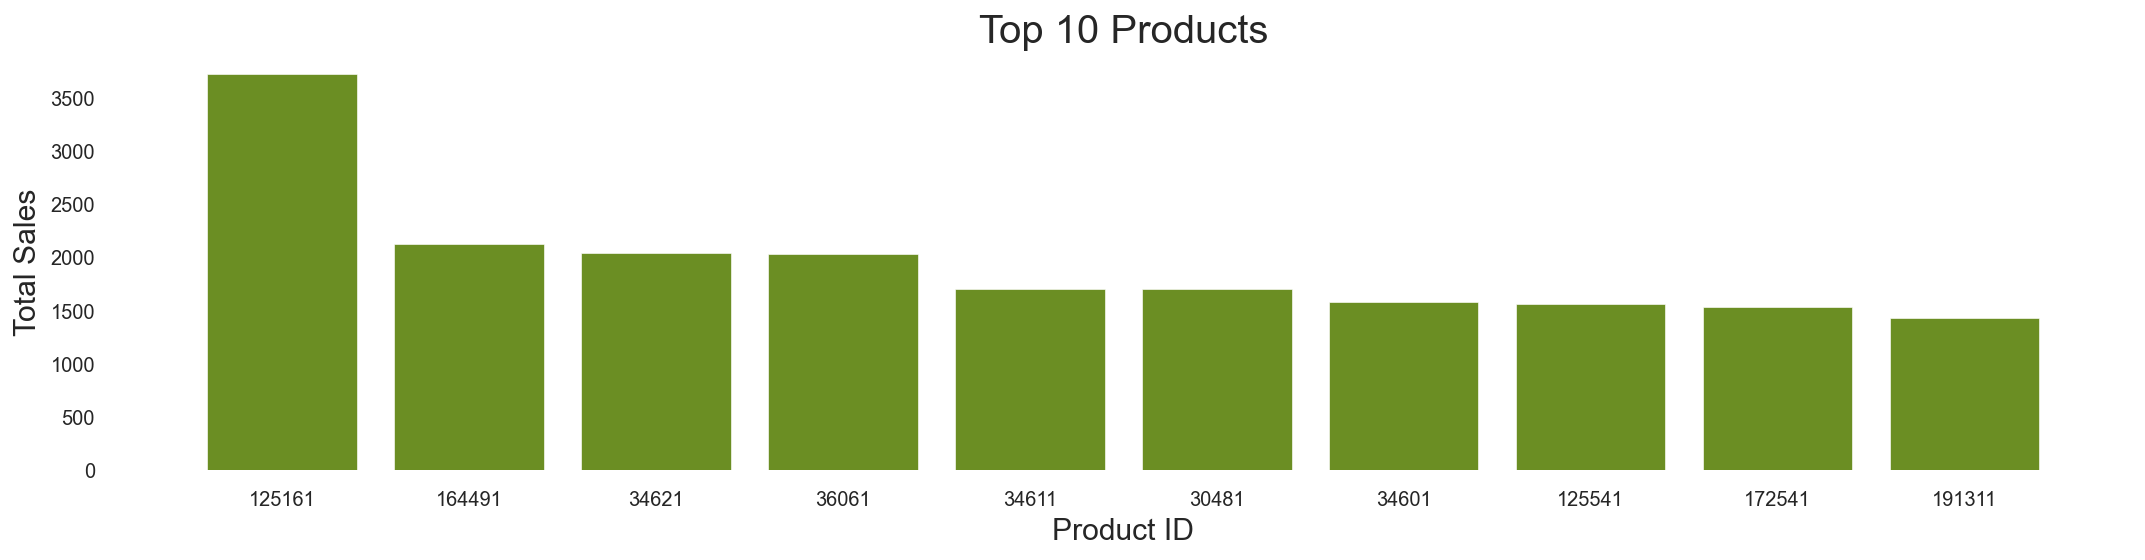

In [40]:
fig, axes = plt.subplots(figsize=(15,4))  # make one subplot (ax) on the figure

top_10.productid = top_10.productid.astype(str)

axes.bar(top_10["productid"], top_10["soldquantity"],color="olivedrab")

axes.set_xlabel("Product ID",         fontsize=15, fontname="Arial")
axes.set_ylabel("Total Sales", fontsize=15, fontname="Arial")
axes.set_title("Top 10 Products",      fontsize=20, fontname="Arial")

plt.tight_layout() 
plt.show()

---

#### 4.d. Sampling

Main dataset will be sampled since the data is too huge to put any operations with personal computer

In [41]:
len(df_merged)

858935

In [42]:
print("Day Range:",df_merged["date"].max()-df_merged["date"].min())

Day Range: 71 days 00:00:00


In [43]:
date_mask = (df_merged['date'] >= '2018-11-01') & (df_merged['date'] <= '2018-11-07')

df_merged = df_merged[date_mask]

#Print the size
len(df_merged)

82792

### 5. Data Transformation

#### 5.a One Hot Encoding

#### What is One Hot Encoding?
A one hot encoding is a representation of categorical variables as binary vectors. This requires that the categorical values be mapped to integer values.

#### Why Use a One Hot Encoding?
A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

In [44]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82792 entries, 40 to 848929
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   productid     82792 non-null  int64         
 1   date          82792 non-null  datetime64[ns]
 2   soldquantity  82792 non-null  int64         
 3   clickcount    82792 non-null  int64         
 4   favoredcount  82792 non-null  int64         
 5   gender        82792 non-null  object        
 6   brandid       82792 non-null  object        
 7   price         82792 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 5.7+ MB


In [45]:
def get_month_year(df):
    """Parse date to seperate day, month year columns"""
    df['day'] = pd.DatetimeIndex(df['date']).day
    df['month'] = pd.DatetimeIndex(df['date']).month
    df['year'] = pd.DatetimeIndex(df['date']).year
    
    return df

df_merged = get_month_year(df_merged)

df_merged = df_merged.drop('date', axis=1)

In [46]:
df_merged

,productid,soldquantity,clickcount,favoredcount,gender,brandid,price,day,month,year
40,81,0,147,4,2,390,2114,1,11,2018
47,101,0,62,0,1,390,2358,5,11,2018
54,101,0,43,0,1,390,2358,4,11,2018
61,111,0,92,3,2,390,2998,7,11,2018
62,111,0,124,2,2,390,2998,6,11,2018
...,...,...,...,...,...,...,...,...,...,...
847657,170041,0,1,2,2,319,527,6,11,2018
848293,171351,0,23,1,2,385,520,6,11,2018
848434,171561,0,698,0,2,340,1571,7,11,2018
848603,171921,0,22,3,2,1183,1011,7,11,2018


In [47]:
%%time
## One hot encoding using get_dummies on pandas dataframe.
dummy_variables = ["gender"]

for var in dummy_variables:
    dummy = pd.get_dummies(df_merged[var], prefix = var, drop_first = False)
    df_merged = pd.concat([df_merged, dummy], axis = 1)

df_merged = df_merged.drop(dummy_variables, axis = 1)
df_merged = df_merged.drop(['year'], axis = 1) # Sample data is in same year
df_merged = df_merged.drop(['month'], axis = 1) # Sample data is in same month

CPU times: user 30.4 ms, sys: 7.04 ms, total: 37.4 ms
Wall time: 36.2 ms


In [48]:
df_merged.head()

,productid,soldquantity,clickcount,favoredcount,brandid,price,day,gender_1,gender_2,gender_3
40,81,0,147,4,390,2114,1,0,1,0
47,101,0,62,0,390,2358,5,1,0,0
54,101,0,43,0,390,2358,4,1,0,0
61,111,0,92,3,390,2998,7,0,1,0
62,111,0,124,2,390,2998,6,0,1,0


In [49]:
df_merged.shape

(82792, 10)

Scaling

In [50]:
#We keep this value to re-scale the predicted sales values in the following lines of code.
min_train, max_train = df_merged['soldquantity'].min(), df_merged['soldquantity'].max()

scalable_variables = ['soldquantity',"clickcount","favoredcount","price"]

for var in scalable_variables:
    mini, maxi = df_merged[var].min(), df_merged[var].max()
    df_merged.loc[:,var] = (df_merged[var] - mini) / (maxi - mini)

In [51]:
print('Shape : ', df_merged.shape)
df_merged.sample(10)

Shape :  (82792, 10)


,productid,soldquantity,clickcount,favoredcount,brandid,price,day,gender_1,gender_2,gender_3
807603,107871,0.000000,0.000093,0.000000,326,0.657138,6,0,1,0
225402,65621,0.000000,0.000840,0.000000,1183,0.171153,1,0,1,0
417135,123841,0.000000,0.002148,0.000000,972,0.319287,6,1,0,0
76287,17471,0.000000,0.011765,0.002653,467,0.262669,6,0,1,0
677783,116301,0.000000,0.001961,0.000000,326,0.519955,7,1,0,0
186711,55041,0.000000,0.000747,0.000000,1355,0.204010,5,0,1,0
176364,51081,0.000000,0.003828,0.000000,1331,0.319287,4,0,1,0
255973,91391,0.000000,0.000280,0.000000,1129,0.023761,3,1,0,0
137340,39481,0.042857,0.008964,0.000000,912,0.107852,2,0,1,0
438694,132581,0.000000,0.000654,0.000000,711,0.033971,3,1,0,0


In [52]:
df_merged.isnull().sum()

productid       0
soldquantity    0
clickcount      0
favoredcount    0
brandid         0
price           0
day             0
gender_1        0
gender_2        0
gender_3        0
dtype: int64

In [53]:
df_merged.head()

,productid,soldquantity,clickcount,favoredcount,brandid,price,day,gender_1,gender_2,gender_3
40,81,0.0,0.013725,0.005305,390,0.392241,1,0,1,0
47,101,0.0,0.005789,0.000000,390,0.437535,5,1,0,0
54,101,0.0,0.004015,0.000000,390,0.437535,4,1,0,0
61,111,0.0,0.008590,0.003979,390,0.556339,7,0,1,0
62,111,0.0,0.011578,0.002653,390,0.556339,6,0,1,0


In [54]:
df_merged = df_merged.astype(float) # For model input

Train and Test Data Preperation

In [55]:
#train database without soldquantity which is the target variable
df_merged = df_merged.reset_index(drop=True)  #we reset the index
y = df_merged['soldquantity']
X = df_merged.drop(['soldquantity'], axis = 1)

print('Shape X :', X.shape)
print('Shape y :', y.shape)

Shape X : (82792, 9)
Shape y : (82792,)


In [56]:
num_test = 0.20 # test train data ratio is selected as %20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, random_state=15)
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('X_test shape :', X_test.shape)
print('y_test shape :', y_test.shape)

X_train shape : (66233, 9)
y_train shape : (66233,)
X_test shape : (16559, 9)
y_test shape : (16559,)


In [57]:
scores = [["MODELS","ACCURACY (R2 Score)","PARAMETERS"]]

### 6 Regression Techniques

#### 6.a. Linear Regression

In [58]:
%%time
# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print(results)

LinearRegression()
CPU times: user 40 ms, sys: 6.14 ms, total: 46.1 ms
Wall time: 21.6 ms


In [59]:
# Print the coefficients
print (results.intercept_, results.coef_)

0.0021693834677663226 [ 9.06474750e-09  8.20592300e-01  4.04427966e-02 -1.54530581e-07
 -7.64500392e-03 -4.42838106e-05  3.27797048e-04 -7.71865797e-04
  4.44068749e-04]


In [60]:
%%time

import statsmodels.api as sm
model = sm.OLS(y_train, X_train)
results = model.fit()
# Statsmodels gives R-like statistical output
scores.append(["Linear Regression",results.rsquared,"clickcount, favoredcount, brandid, price, date and gender"])
results.summary()

CPU times: user 964 ms, sys: 156 ms, total: 1.12 s
Wall time: 726 ms


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           soldquantity   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                 1.227e+04
Date:                Sun, 06 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:00:02   Log-Likelihood:             1.9895e+05
No. Observations:               66233   AIC:                        -3.979e+05
Df Residuals:                   66224   BIC:                        -3.978e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
productid     9.065e-09   9.66e-10      9.382      0.000    7.17e-09     1.1e-08
clickcount       0.8206      0.004    230.403      0.000       0.814       0.828
favoredcount     0.0404      0.008      5.094      0.000       0.025       0.056
brandid      -1.545e-07   1.15e-07     -1.339      0.181   -3.81e-07    7.17e-08
price           -0.0076      0.000    -33.748      0.000      -0.008      -0.007
day          -4.428e-05   2.34e-05     -1.896      0.058   -9.01e-05    1.49e-06
gender_1         0.0025      0.000     12.994      0.000       0.002       0.003
gender_2         0.0014      0.000      7.979      0.000       0.001       0.002
gender_3         0.0026      0.000      9.584      0.000       0.002       0.003
==============================================================================
Omnibus:                   103510.480   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        274333328.963
Skew:                           9.382   Prob(JB):                         0.00
Kurtosis:                     317.729   Cond. No.                     1.80e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Cross Validation using Scikit Learn

R^2 value is basically dependant on the way the data is split. Hence, there may be times when the R^2 value may not be able to
represent the model's ability to generalize. For this we perform cross validation.

In [61]:
reg=linear_model.LinearRegression()
cv_results=cross_val_score(reg,X_train,y_train,cv=5)
print(cv_results)
print(np.mean(cv_results))
print(np.std(cv_results))
#Using cross validation of score 5

[0.62428435 0.58702267 0.49645113 0.59406343 0.64747112]
0.5898585392946327
0.05148788711928534


## Regularization

We perform regularization in order to alter the loss function to penalize it for having higher coefficients for each feature variable. And as we know, large coefficients leads to overfitting.

In [62]:
ridge = Ridge(alpha=0.1, normalize = True)
ridge.fit(X_train,y_train)
ridge_pred=ridge.predict(X_test)
ridge.score(X_test,y_test)
#The score is pretty much similar to the linear model built which ensures that the model has passed the Ridge regression test
# for regularization
#Ridge is used to penalize the loss function by adding the OLS loss function to the square of each coefficient multiplied by alpha.

0.6441457957366479

## 6.b DecisionTree Regressor

A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.



In [63]:
dtr=DecisionTreeRegressor(max_depth=10,min_samples_leaf=5,max_leaf_nodes=5)

In [64]:
%%time
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

scores.append(["Decision Tree Regressor",r2_score(y_test, y_pred),"clickcount, favoredcount, brandid, price, date and gender"])

##using a decision tree greatly improves the accurancy of model prediction.

R2 score =  0.580571356352739 / 1.0
MSE score =  0.00015609392970399586 / 0.0
CPU times: user 237 ms, sys: 6.53 ms, total: 244 ms
Wall time: 60.8 ms


## 6.c. ExtraTreesRegressor

Extra-trees differ from classic decision trees in the way they are built. When looking for the best split to separate the samples of a node into two groups, random splits are drawn for each of the max_features randomly selected features and the best split among those is chosen.

In [65]:
%%time
etr = ExtraTreesRegressor()

# Choose some parameter combinations to try

parameters = {'n_estimators': [5,10,100],
              'criterion': ['mse'],
              'max_depth': [5,10,15], 
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5]
             }

#Determines the cross-validation splitting strategy

grid_obj = GridSearchCV(etr, parameters,
                        cv=3, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
etr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
etr.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   46.1s finished


CPU times: user 11.5 s, sys: 602 ms, total: 12.1 s
Wall time: 56.8 s


ExtraTreesRegressor(max_depth=15, min_samples_split=5)

In [66]:
y_pred = etr.predict(X_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

scores.append(["Extra Trees Regressor",r2_score(y_test, y_pred),"clickcount, favoredcount, brandid, price, date and gender"])

R2 score =  0.7852103602667404 / 1.0
MSE score =  7.993578748967484e-05 / 0.0


## 6.d Random Forest Regressor

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.Random decision forests correct for decision trees' habit of overfitting to their training set.

In [67]:
%%time
# Choose the type of classifier. 
RFR = RandomForestRegressor()

# Choose some parameter combinations to try
parameters = {'n_estimators': [5, 10, 100],
              'min_samples_leaf': [1,5]
             }

#Determines the cross-validation splitting strategy
grid_obj = GridSearchCV(RFR, parameters,
                        cv=5, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
RFR = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
RFR.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   41.0s finished


CPU times: user 30.3 s, sys: 215 ms, total: 30.5 s
Wall time: 1min 11s


RandomForestRegressor()

In [68]:
y_pred = RFR.predict(X_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

scores.append(["Random Forest Regressor A",r2_score(y_test, y_pred),"clickcount, favoredcount, brandid, price, date and gender"])

R2 score =  0.7839325495452955 / 1.0
MSE score =  8.041133559529252e-05 / 0.0


In [69]:
RFR = RandomForestRegressor()

# Choose some parameter combinations to try
parameters = {'n_estimators': [5,10,100],
              'criterion': ['mse'],
              'max_depth': [5,10,15], 
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5]
             }

#Determines the cross-validation splitting strategy
grid_obj = GridSearchCV(RFR, parameters,
                        cv=5, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
RFR = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
RFR.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  3.1min finished


RandomForestRegressor(max_depth=10)

In [70]:
y_pred = RFR.predict(X_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')

scores.append(["Random Forest Regressor B",r2_score(y_test, y_pred),"clickcount, favoredcount, brandid, price, date and gender"])

R2 score =  0.7819988713018495 / 1.0
MSE score =  8.113097036600801e-05 / 0.0


### 6.e. Gradient Boosting Regressor

The idea of boosting came out of the idea of whether a weak learner can be modified to become better.
A weak hypothesis or weak learner is defined as one whose performance is at least slightly better than random chance.
Hypothesis boosting was the idea of filtering observations, leaving those observations that the weak learner can handle and focusing on developing new weak learns to handle the remaining difficult observations.

### How Gradient Boosting Works

Gradient boosting involves three elements:

* A loss function to be optimized.

* A weak learner to make predictions.

* An additive model to add weak learners to minimize the loss function.

In [71]:
gbr=GradientBoostingRegressor()

parameters = {'n_estimators': [5,10],
              'loss':['huber'],
              'criterion': ['mse'],
              'max_depth': [5,10], 
              'min_samples_split': [2,5],
              'min_samples_leaf': [1,5]
             }

grid_obj = GridSearchCV(gbr, parameters,
                        cv=5, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gbr.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   20.8s finished


GradientBoostingRegressor(criterion='mse', loss='huber', max_depth=10,
                          min_samples_leaf=5, n_estimators=10)

In [72]:
y_pred = gbr.predict(X_test)

print('R2 score using Gradient Boosting= ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score using Gradient Boosting= ',mean_squared_error(y_test, y_pred), '/ 0.0')
scores.append(["Gradient Boosting Regressor",r2_score(y_test, y_pred),"clickcount, favoredcount, brandid, price, date and gender"])

R2 score using Gradient Boosting=  0.46306861897558094 / 1.0
MSE score using Gradient Boosting=  0.00019982357074301455 / 0.0


In [73]:
gbr = GradientBoostingRegressor(loss='ls',learning_rate=0.1,n_estimators=150,max_depth=10,min_samples_split=5)


parameters = {'n_estimators': [5,15,150],
              'loss':['ls','huber'],
              'criterion': ['mse'],
              'max_depth': [10,15], 
              'min_samples_split': [2,5],
              'min_samples_leaf': [1,5]
             }

#Determines the cross-validation splitting strategy
grid_obj = GridSearchCV(gbr, parameters,
                        cv=5, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gbr.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 12.0min finished


GradientBoostingRegressor(criterion='mse', loss='huber', max_depth=10,
                          min_samples_split=5, n_estimators=150)

In [74]:
y_pred = gbr.predict(X_test)

print('R2 score using Gradient Boosting= ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score using Gradient Boosting= ',mean_squared_error(y_test, y_pred), '/ 0.0')

scores.append(["Gradient Boosting Regressor With LS Loss Function",r2_score(y_test, y_pred),"clickcount, favoredcount, brandid, price, date and gender"])

R2 score using Gradient Boosting=  0.7880447948450944 / 1.0
MSE score using Gradient Boosting=  7.888092860360352e-05 / 0.0


### 6.f. XGBOOST

XGBoost (eXtreme Gradient Boosting) is a direct application of Gradient Boosting for decision trees

Main advantages are as follows:
1. Easy to use
2. Computational efficiency
3. Model Accuracy
4. Feasibility — easy to tune parameters and modify objectives.

In [75]:
model=XGBRegressor(max_depth=5)

In [76]:
%%time
model.fit(X_train,y_train)

CPU times: user 8.47 s, sys: 49 ms, total: 8.52 s
Wall time: 1.11 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
y_pred=model.predict(X_test)

In [78]:
print('R2 score using XG Boost= ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score using XG Boost= ',mean_squared_error(y_test, y_pred), '/ 0.0')

scores.append(["XGBoost Regressor",r2_score(y_test, y_pred),"clickcount, favoredcount, brandid, price, date and gender"])

R2 score using XG Boost=  0.7854400630420487 / 1.0
MSE score using XG Boost=  7.98503016522032e-05 / 0.0


## 7. LGBM

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

Since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. 

In [79]:

from lightgbm import LGBMRegressor
lgbm=LGBMRegressor(max_depth=5)
lgbm.fit(X_train,y_train)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


LGBMRegressor(max_depth=5)

In [80]:
y_pred=lgbm.predict(X_test)

In [81]:
print('R2 score using LGBM = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score using LGBM = ',mean_squared_error(y_test, y_pred), '/ 0.0')

scores.append(["LGBM",r2_score(y_test, y_pred),"clickcount, favoredcount, brandid, price, date and gender"])

R2 score using LGBM =  0.7469368424127084 / 1.0
MSE score using LGBM =  9.417960201192826e-05 / 0.0


In [82]:
execTime = time.time()-start

In [83]:
print("Total Execution Time:",round(execTime/60,2),"minutes")

Total Execution Time: 20.4 minutes


### 8. Assumptions:

- By the correlation evidences, I assumed that subcategory and categoryId has nearly no impact on the sales so it is removed from the merged dataset.
- Stock information has no impact on sales because the customer does not know this information.
- Above assumptions made with the help of Exploratory data anlysis, domain knowledge and human experiences.

#### Answers

A.1. : The target variable is soldquantity because the main goal is to predict sales amount for each product. I create my test dataset with this information.<br>
A.2. : Final dataset formatted according the column inormation. Then merged with product attribute dataset on "productid" column. The columns which has no impact and correlation on the sales number removed by making assumptions.<br>
A.3. : I split the train and dataset with 0.2 ratio. It means dataset splitted 1/5. I used K Fold Validation to see if this split method has some impact on the predictions. In addition, models determined the best estimator feature sets with gridsearch.<br>
A.4. : Linear regresison, Decision Tree Regressor, Extra Trees Regressor, Random Forest with different parameters, Gradient Boosting with different loss functions, XGBoost and LGBM methods are used for the modelling. Since all the values converted to numeric value. I thought that regressor would work fine in this dataset.<br>
A.5. : Model performances are shown in below table. I used R squared metric to measure the model performance.


In [87]:
from IPython.display import HTML, display
import tabulate
for i,result in enumerate(scores):
    if i!=0:
        result[1] = round(result[1],7)
print("          TABLE of MODELS")
display(HTML(tabulate.tabulate(scores, tablefmt='html')))

          TABLE of MODELS


MODELS,ACCURACY (R2 Score),PARAMETERS
Linear Regression,0.6,"clickcount, favoredcount, brandid, price, date and gender"
Decision Tree Regressor,0.58,"clickcount, favoredcount, brandid, price, date and gender"
Extra Trees Regressor,0.79,"clickcount, favoredcount, brandid, price, date and gender"
Random Forest Regressor A,0.78,"clickcount, favoredcount, brandid, price, date and gender"
Random Forest Regressor B,0.78,"clickcount, favoredcount, brandid, price, date and gender"
Gradient Boosting Regressor,0.46,"clickcount, favoredcount, brandid, price, date and gender"
Gradient Boosting Regressor With LS Loss Function,0.79,"clickcount, favoredcount, brandid, price, date and gender"
XGBoost Regressor,0.79,"clickcount, favoredcount, brandid, price, date and gender"
LGBM,0.75,"clickcount, favoredcount, brandid, price, date and gender"


### 9. Conclusions

In this case study, regression methods with different regressors, xgboost and LGBM models has built in order to predict sales number of every product. In addition, in the EDA process, some outliers have detected and some assumptions made by using business expertise and EDA results.<br>

Above scores can be increased with hyper-parameter tuning, feature engineerin, different models and other method. 

### 10.Future Works

Firstly, this analysis could be run on the high computational power environment such as cloud. It was challenging to do this case study since I used grid search cross validation with personal computer so I sampled the dataset. It took time to fit models beacuse of the high number of product attributes. Therefore, I used sampling as 7 day subset of the main dataset.

Secondly, a new feature "is before special time period" (New year, discount week, season ending and religional holidays) can be added to the dataset in the perspective of feature engineering. In the overall trend, it is clear that sales increased in some time periods dramatically.

Finally, deep learning methods can be built with the merged dataset. It is appropriate for the deep learning models because of the high variety of numeric attribute.

---